In [1]:

import pandas as pd  # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt  # type: ignore

In [5]:
df = pd.read_excel("hearing_test.xlsx")
df

,age,physical_score,test_result
0,33,40.7,1
1,50,37.2,1
2,52,24.7,0
3,56,31.0,0
4,35,42.9,1
...,...,...,...
4995,73,3.9,0
4996,57,33.9,1
4997,49,34.5,1
4998,38,46.4,1


Text(0, 0.5, 'Physical Score')

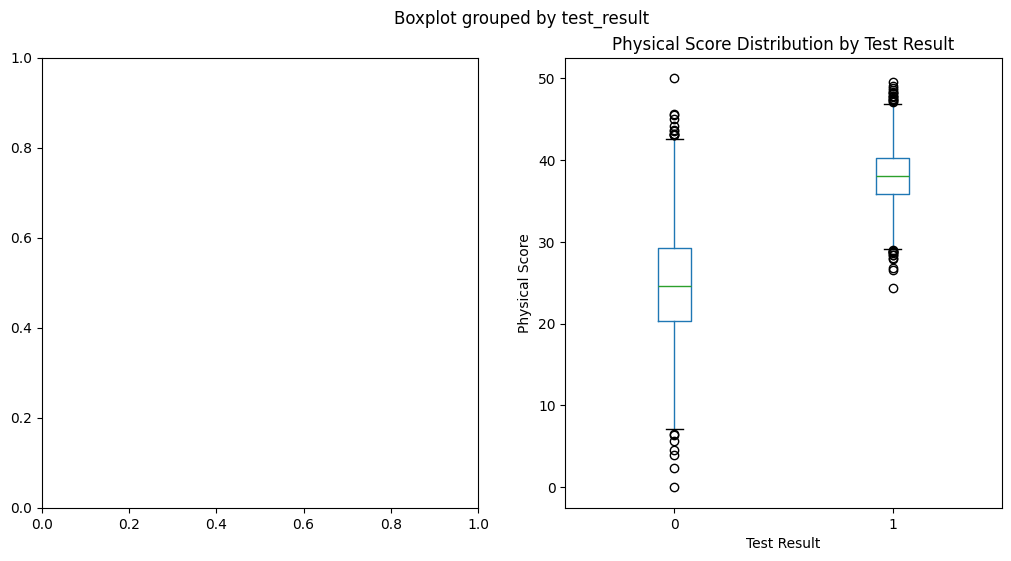

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
df.boxplot(column='physical_score', by='test_result', ax=axes[1], grid=False)
axes[1].set_title('Physical Score Distribution by Test Result')
axes[1].set_xlabel('Test Result')
axes[1].set_ylabel('Physical Score')

In [24]:

x = df[["age", "physical_score"]]
y = df["test_result"]


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42) 

In [14]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter=1000) 

In [17]:
reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
# Function to predict test result based on user input
def predict_test_result():
    try:
        # Asking for user inputs
        age = float(input("Enter age: "))
        physical_score = float(input("Enter physical score: "))
        
        # Predict the result using the trained model
        result = reg.predict([[age, physical_score]])[0]
        
        # Return the predicted result
        if result == 1:
            print("Test result: Positive")
        else:
            print("Test result: Negative")
    except ValueError:
        print("Please enter valid numeric inputs for age and physical score.")

In [22]:
predict_test_result()

Test result: Positive


c:\Users\aftab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [23]:
#Accuracy score of this model 
from sklearn.metrics import accuracy_score


# Make predictions on the test set
y_pred = reg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

Accuracy of the model: 89.70%
